In [ ]:
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras import layers
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import pandas as pd
from keras.layers import Input, Dense, Activation, Flatten, Conv2D, Lambda, MaxPooling2D, Dropout
from keras import models
from keras import layers
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.applications import DenseNet121
from keras_preprocessing.image import ImageDataGenerator
from scipy import pi


2.2.0


Using TensorFlow backend.


In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip "/content/gdrive/My Drive/Sem2/Project/train.zip" -d "./"

In [ ]:
!unzip "/content/gdrive/My Drive/Sem2/Project/test.zip" -d "./"

In [ ]:
trainDF = pd.read_csv("/content/gdrive/My Drive/Sem2/Project/train.txt", sep=" ", header=None)
trainDF.columns = ['Images', 'SteeringAngle'] 
trainDF['SteeringAngle'] = trainDF['SteeringAngle'] * (pi / 180)

testDF = pd.read_csv("/content/gdrive/My Drive/Sem2/Project/test.txt", sep=" ", header=None)
testDF.columns = ['Images', 'SteeringAngle'] 

datagen = ImageDataGenerator(
            rescale=1./255,
            zca_whitening=True,
            rotation_range=5,
            zoom_range=[0.1, 0.5],
            height_shift_range=[0.1,0.3],
            brightness_range=[0.55,1.0],
            fill_mode='nearest',
            validation_split=0.25)

trainData = trainDF.shape[0] * 0.75
valData = trainDF.shape[0] * 0.25
# print(trainData, valData)

test_datagen = ImageDataGenerator(rescale=1./255)

BatchSize = 98

train_generator=datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/content/train/",
x_col="Images",
y_col="SteeringAngle",
subset="training",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))

validation_generator = datagen.flow_from_dataframe(
dataframe=trainDF,
directory="/content/train/",
x_col="Images",
y_col="SteeringAngle",
subset="validation",
batch_size=BatchSize,
seed=42,
shuffle=False,
class_mode="raw",
target_size=(100,200))


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:337: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 27342 validated image filenames.
Found 9113 validated image filenames.


In [ ]:
def architecture(width, height, depth):

    model = DenseNet121(weights='imagenet', include_top=False, input_shape=(height, width, depth))
    return model

model = architecture(width=200, height=100, depth=3)
print (model.summary())

29089792/29084464 [==============================] - 2s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 100, 200, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 106, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 50, 100, 64)  9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 50, 100, 64)  256         conv1/conv[0][0]                 
_______________________

In [ ]:
def DenseNet121_FT(width, height, depth):

    conv_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(height, width, depth))

    model = models.Sequential()
    model.add(conv_base)
    conv_base.trainable = False
    model.add(layers.Flatten())

    model.add(Dense(1164, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='relu'))    
    model.add(Dense(1, activation='linear'))

    return model


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


279/279 [==============================] - 276s 989ms/step - loss: 0.2098 - val_loss: 0.1739

Epoch 00001: saving model to /content/gdrive/My Drive/Sem2/Project/DenseNet/FT/DenseNet_FT_weights.01-0.17.h5


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


Epoch 2/10
279/279 [==============================] - 268s 961ms/step - loss: 0.2093 - val_loss: 0.1720

Epoch 00002: saving model to /content/gdrive/My Drive/Sem2/Project/DenseNet/FT/DenseNet_FT_weights.02-0.17.h5
Epoch 3/10
279/279 [==============================] - 269s 963ms/step - loss: 0.2088 - val_loss: 0.1718

Epoch 00003: saving model to /content/gdrive/My Drive/Sem2/Project/DenseNet/FT/DenseNet_FT_weights.03-0.17.h5
Epoch 4/10
279/279 [==============================] - 271s 970ms/step - loss: 0.2088 - val_loss: 0.1722

Epoch 00004: saving model to /content/gdrive/My Drive/Sem2/Project/DenseNet/FT/DenseNet_FT_weights.04-0.17.h5
Epoch 5/10
279/279 [==============================] - 272s 975ms/step - loss: 0.2084 - val_loss: 0.1694

Epoch 00005: saving model to /content/gdrive/My Drive/Sem2/Project/DenseNet/FT/DenseNet_FT_weights.05-0.17.h5
Epoch 6/10
279/279 [==============================] - 273s 979ms/step - loss: 0.2082 - val_loss: 0.1696

Epoch 00006: saving model to /conte

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:7

avg_train_loss: 0.20876200251718546
avg_val_loss: 0.17121888548135758
difference: 0.03754311703582788


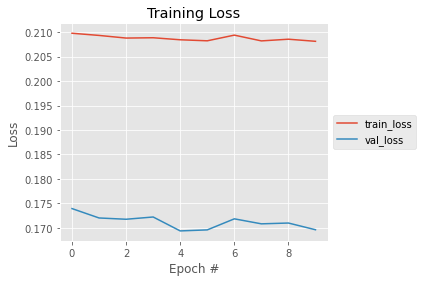

In [ ]:
from keras.callbacks import ModelCheckpoint

NUM_EPOCHS = 10

model = DenseNet121_FT(width=200, height=100, depth=3)

filepath =  "/content/gdrive/My Drive/Sem2/Project/DenseNet/DA/DenseNet_DA_weights.08-0.17.h5"

model.load_weights(filepath)

conv_base = DenseNet121(weights='imagenet', include_top=False, input_shape=(100, 200, 3))

conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'conv5_block1_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adadelta(lr=1e-3), loss="mse")

filepath1 = "/content/gdrive/My Drive/Sem2/Project/DenseNet/FT/DenseNet_FT_weights.{epoch:02d}-{val_loss:.2f}.h5"
checkpoint = ModelCheckpoint(filepath1, verbose=1)

history = model.fit(
                train_generator,
                steps_per_epoch=round(trainData/BatchSize),
                epochs=NUM_EPOCHS,
                validation_data=validation_generator,
                validation_steps=round(valData/BatchSize),
                callbacks=[checkpoint])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, NUM_EPOCHS), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, NUM_EPOCHS), history.history["val_loss"], label="val_loss")
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
# https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot
ax = plt.subplot(111)
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

avg_train_loss = sum(history.history["loss"])/NUM_EPOCHS
avg_val_loss = sum(history.history["val_loss"])/NUM_EPOCHS

print("avg_train_loss: " + str(avg_train_loss))
print("avg_val_loss: " + str(avg_val_loss))
print("difference: " + str(abs(avg_train_loss - avg_val_loss)))


model.save_weights(filepath)

In [ ]:
from keras.models import load_model

test_generator=test_datagen.flow_from_dataframe(
dataframe=testDF,
directory="/content/test/",
x_col="Images",
# y_col="SteeringAngle",
y_col=None,    
batch_size=100,
seed=42,
shuffle=False,
class_mode=None,
target_size=(100,200))

filepath = "/content/gdrive/My Drive/Sem2/Project/DenseNet/FT/DenseNet_FT_weights.07-0.17.h5"

model.load_weights(filepath)


predictions = model.predict(test_generator)
print('Predictions: ', predictions.shape)

Found 8951 validated image filenames.
Predictions:  (8951, 1)


In [ ]:
import pandas as pd

Images = testDF['Images']
preds = predictions
actual = testDF['SteeringAngle']

df_preds = pd.DataFrame(Images)
df_preds['Actual Steering Angle'] = (actual * (pi / 180))
df_preds['Predicted Steering Angle'] = preds
df_preds.rename(columns = {0:'Images'}, inplace = True) 

df_preds['MAE'] = 0

for i in range(len(df_preds)):
  df_preds.iloc[i, -1] = abs(df_preds.iloc[i, 1] - df_preds.iloc[i, 2])

mae_sum = 0
for i in range(len(df_preds)):
    mae_sum += df_preds.iloc[i, -1]
    
print("mae_sum: " + str(mae_sum))    
MAE = mae_sum / len(df_preds)
print("len(df_preds): " + str(len(df_preds)))
print("MAE: " + str(MAE))

mae_sum: 1980.364896182127
len(df_preds): 8951
MAE: 0.22124510067949135
